In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## The SD and Bell Shaped Curves

In [2]:
births = Table.read_table('baby.csv')

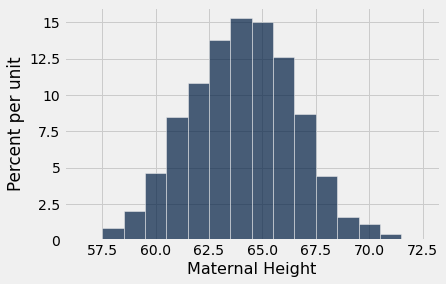

In [3]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [4]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [5]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.574429188837968, 61.524378306903088)

## Central Limit Theorem ##

In [6]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


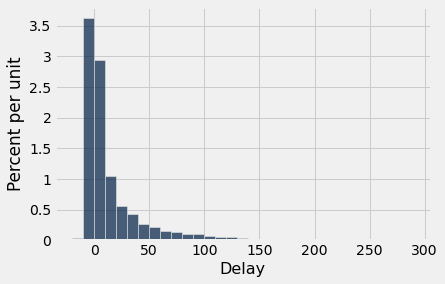

In [7]:
united.hist('Delay', bins=united_bins)

In [8]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [9]:
percentile(50, delays)

2

In [10]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [11]:
one_sample_mean(100)

29.18

In [12]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [13]:
sample_means_100 = ten_thousand_sample_means(100)

In [14]:
sample_means_100

array([ 15.21,   8.92,  17.93, ...,  29.22,  16.16,  12.55])

In [15]:
len(sample_means_100)

10000

Population Average: 16.6581555154


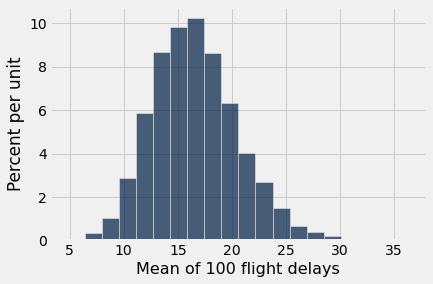

In [16]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.6581555154


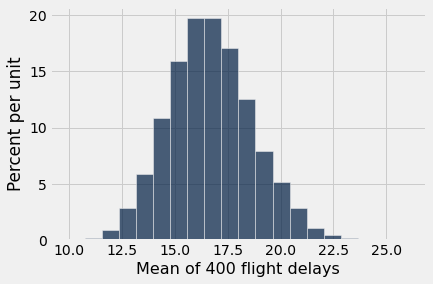

In [17]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)